# Gegenüberstellung Grippetote vs. Covidtote im Zeitraum 2017-2020

Hierfür wurden die Daten aus dem Statistischen Bundesamt Destatis ID 23211-0002 verwendet.

In [7]:
#Import
from pygenesis.py_genesis_client import PyGenesisClient
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates


In [8]:
#Data
BEVOELKERUNGSSTAND = '12411-0001'
TODESFAELLE = '12613-0002'
Sterbefälle_je_1000_Einwohner_Deutschland_Monate = '12613-0005'
TODESURSACHE = '23211-0002'

In [9]:
DATA_DIR = Path.cwd()
file_path_data = DATA_DIR / '23211-0002.xlsx'
df = pd.read_excel(file_path_data, header = 4)
df.head()

,Todesursachenstatistik,männlich,weiblich,Insgesamt,Jahre
0,Grippe,64,51,115,2010
1,"COVID-19, Virus nachgewiesen",-,-,-,2010
2,"COVID-19, Virus nicht nachgewiesen",-,-,-,2010
3,Insgesamt,409022,449746,858768,2010
4,Grippe,136,89,225,2011


In [10]:
#Tabelle bearbeiten
df.rename(columns={"Todesursachenstatistik": "Todesursache"}, inplace=True)
df.drop(['männlich', 'weiblich'], axis=1,inplace=True) #delete column with männlich and weiblich
df = df[df.Insgesamt != '-'] # keep rows without '-'

In [11]:
#Filtern nach Werten
df_grippe = df.loc[df['Todesursache'] == 'Grippe']
df_covid = df.loc[(df['Todesursache'] == 'COVID-19, Virus nicht nachgewiesen') | (df['Todesursache'] == 'COVID-19, Virus nachgewiesen')]
df_insgesamt = df.loc[df['Todesursache'] == 'Insgesamt']


In [12]:
sum_der_grippe_tote = df_grippe['Insgesamt'].sum()
sum_der_covid_tote = df_covid['Insgesamt'].sum()
df_covid_vs_grippe = pd.DataFrame.from_dict({
    'Todesursache': ['COVID-19', 'Grippe'],
    'Insgesamt': [sum_der_covid_tote, sum_der_grippe_tote],
    'Gesamt': [' ', ' ']
})
df_covid_vs_grippe.head()

,Todesursache,Insgesamt,Gesamt
0,COVID-19,39758,
1,Grippe,9219,


Text(0.5, 1.0, 'Coronatote im Jahr 2020 im vergleich Grippetote von 2010-2020')

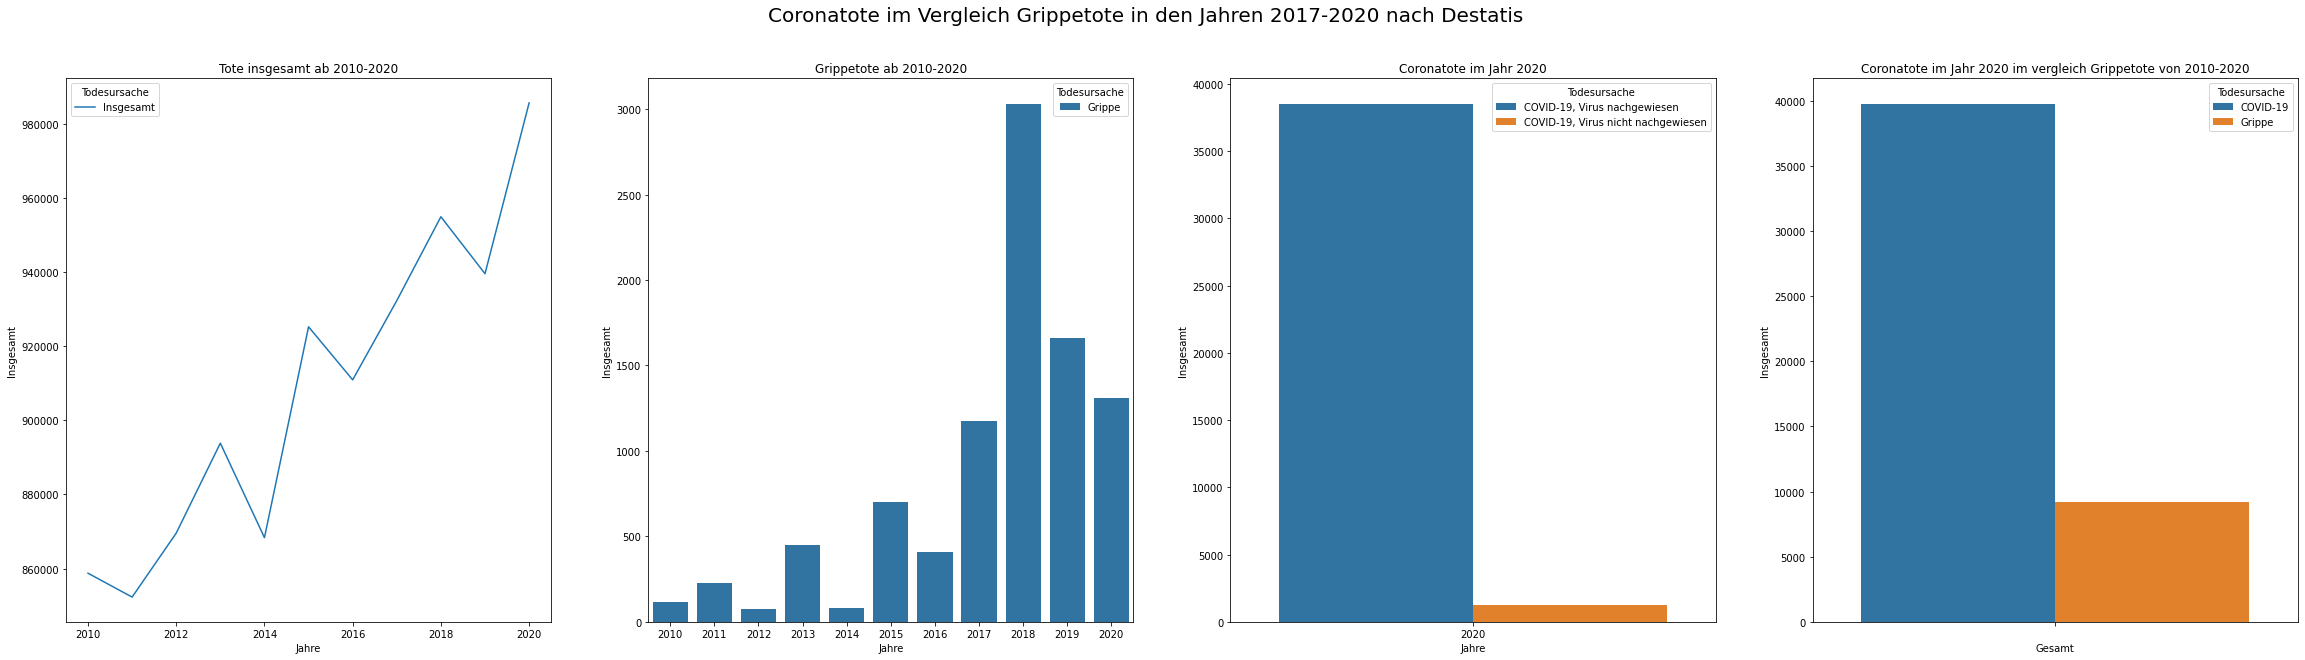

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(40, 10))
fig.suptitle("Coronatote im Vergleich Grippetote in den Jahren 2017-2020 nach Destatis",fontsize = 20)

# Grippe
sns.lineplot(ax=ax[0], data = df_insgesamt, x = "Jahre", y = "Insgesamt" , hue="Todesursache")
ax[0].set_title('Tote insgesamt ab 2010-2020')
plt.ticklabel_format(useOffset=False, style='plain')
# Charmander
sns.barplot(ax=ax[1], data = df_grippe, x = "Jahre", y = "Insgesamt" , hue="Todesursache")
ax[1].set_title('Grippetote ab 2010-2020')

# Squirtle
sns.barplot(ax=ax[2], data = df_covid, x = "Jahre", y = "Insgesamt" , hue="Todesursache")
ax[2].set_title('Coronatote im Jahr 2020')

sns.barplot(ax=ax[3], data = df_covid_vs_grippe, x= 'Gesamt',  y = 'Insgesamt'  , hue="Todesursache")
ax[3].set_title('Coronatote im Jahr 2020 im vergleich Grippetote von 2010-2020')


## Im Anschluss werden die Sterbefälle je 1000 Einwohner Deutschland pro Monate verglichen

Der Vergleich dient zur Veranschaulichung der Todeszahlen zwischen den Insgesamt verstorbenen Menschen in Deutschland im Raum 2017/2018 und 2020/2021.

In [15]:
client = PyGenesisClient(site='DESTATIS', username='DEHFMC984H', password='m\8+iAN&8}9rjj\#')
client.download_excel(Sterbefälle_je_1000_Einwohner_Deutschland_Monate, 'sterbefälle.xlsx') #Sterbefälle_je_1000_Einwohner_Deutschland_Monate
df_sterbefaelle = client.read(Sterbefälle_je_1000_Einwohner_Deutschland_Monate)
df_sterbefaelle.head()

,index.0,index.1,Gestorbene.Anzahl,Sterbefälle je 1000 Einwohner.Anzahl
0,1990,Januar,93601.0,13.9
1,1990,Februar,78118.0,12.9
2,1990,März,78911.0,11.7
3,1990,April,75418.0,11.6
4,1990,Mai,74065.0,11.0


In [16]:
#Daten umformatieren
dict_column = {'index.0': 'Jahre','index.1': 'Monate'}
dict_data = {'Januar': 1,'Februar': 2,'März': 3,'April': 4,'Mai': 5,'Juni': 6,'Juli': 7,'August': 8,'September': 9,'Oktober': 10,'November': 11,'Dezember': 12}

df_sterbefaelle.rename(columns=dict_column, inplace=True)

df_sterbefaelle

,Jahre,Monate,Gestorbene.Anzahl,Sterbefälle je 1000 Einwohner.Anzahl
0,1990,Januar,93601.0,13.9
1,1990,Februar,78118.0,12.9
2,1990,März,78911.0,11.7
3,1990,April,75418.0,11.6
4,1990,Mai,74065.0,11.0
...,...,...,...,...
379,2021,August,76464.0,10.8
380,2021,September,78251.0,11.4
381,2021,Oktober,84282.0,11.9
382,2021,November,93824.0,13.7


In [17]:
df_sterbefaelle.Monate = df_sterbefaelle.Monate.map(dict_data)
df_sterbefaelle['Jahre'] =  df_sterbefaelle.Jahre.astype(int)
df_sterbefaelle['Zeitstempel'] = pd.to_datetime(df_sterbefaelle.Jahre.astype(str) + '/' + df_sterbefaelle.Monate.astype(str) + '/01')
df_sterbefaelle.drop(['Jahre', 'Monate','Sterbefälle je 1000 Einwohner.Anzahl'], axis=1,inplace=True) #delete column with männlich and weiblich
df_sterbefaelle

,Gestorbene.Anzahl,Zeitstempel
0,93601.0,1990-01-01
1,78118.0,1990-02-01
2,78911.0,1990-03-01
3,75418.0,1990-04-01
4,74065.0,1990-05-01
...,...,...
379,76464.0,2021-08-01
380,78251.0,2021-09-01
381,84282.0,2021-10-01
382,93824.0,2021-11-01


In [18]:
df_neu = pd.DataFrame()
data = []
for i in range(len(df_sterbefaelle.index)):
    if i+12 in range(len(df_sterbefaelle.index)):
        data.append(df_sterbefaelle['Gestorbene.Anzahl'][i+12] - df_sterbefaelle['Gestorbene.Anzahl'][i])
df_neu['Delta'] = data
df_neu['Time'] = df_sterbefaelle['Zeitstempel'][:-12]
df_neu

,Delta,Time
0,-13008.0,1990-01-01
1,-98.0,1990-02-01
2,2186.0,1990-03-01
3,-717.0,1990-04-01
4,1853.0,1990-05-01
...,...,...
367,-2278.0,2020-08-01
368,4008.0,2020-09-01
369,4501.0,2020-10-01
370,7835.0,2020-11-01


Text(0.5, 1.0, 'Differentbildung im Vergleich in den Jahren 1990-2021 nach Destatis')

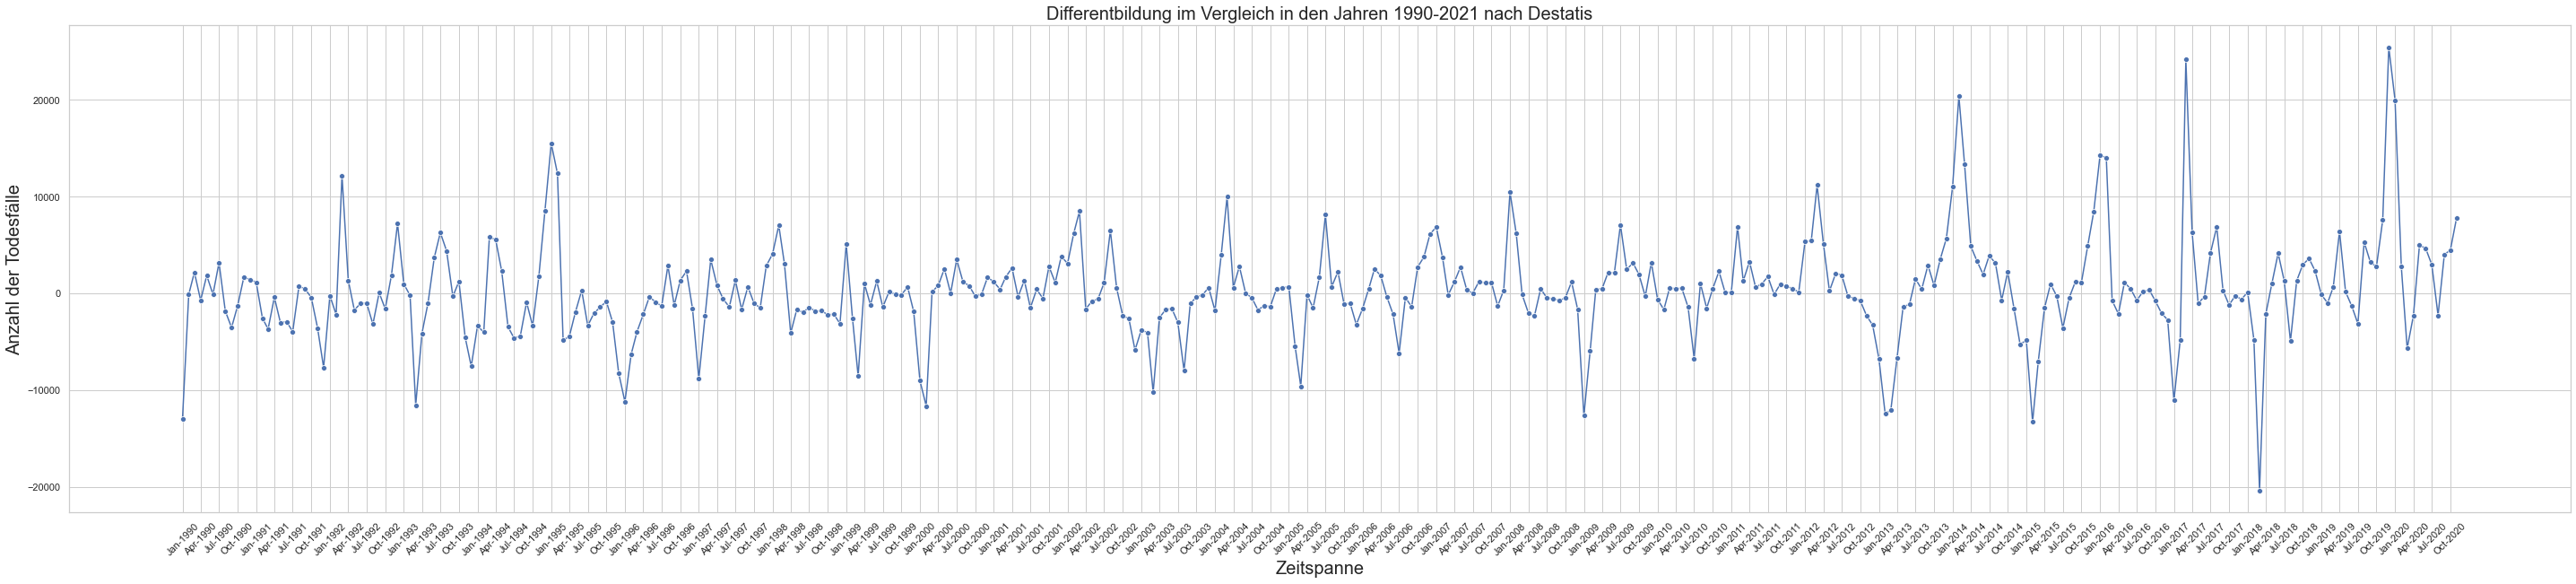

In [24]:
sns.set_theme(style = "whitegrid")
plt.gcf().set_size_inches(50, 10)
bx = sns.lineplot(data = df_neu, x = "Time", y = "Delta", marker="o")
bx.set(xticks=df_neu.Time.values[::3])
bx.set_xticklabels(bx.get_xticks(), rotation = 45)
bx.xaxis.set_major_formatter(dates.DateFormatter("%b-%Y"))
bx.set_ylabel("Anzahl der Todesfälle", fontsize = 20)
bx.set_xlabel("Zeitspanne", fontsize = 20)
bx.set_title("Differentbildung im Vergleich in den Jahren 1990-2021 nach Destatis",fontsize = 20)

In [ ]:
standardized